## Part 1: Introduction
##### The research paper investigates how the circadian clock regulates the timing of floret development in sunflowers. The primary goal is to understand how the clock synchronizes anthesis (flower opening) to form pseudo whorls, even under varying environmental conditions such as constant light, constant darkness, or light/dark cycles. This study uses precise measurements of ovary length and positional data to explore the relationship between circadian rhythms and floral development.
------------------------------------

## Part 2: Relate research questions, data, and figures 
#### To be filled later
------------------------------------

## Part 3: data cleaning and exploration

### 3.1: Load and Clean Data
##### Obtaining the Data
1. The data files can be downloaded from the Dryad Repository for the paper https://datadryad.org/stash/dataset/doi:10.25338/B8CW5R#methods (open the link)
2. Click on "Marshall_030921_OvaryMeasurements_LL30-18.csv" file and it will be downloaded into your computer.
3. After downloading the data: Save the file in the working directory.
4. Check: File should be named as follows: "Marshall_030921_OvaryMeasurements_LL30-18.csv"
5. Run the code cell below.


In [45]:
!pip install pandas # make sure to run this code to have pandas installed in your envirnment

In [31]:
import pandas as pd

# Load the data file into DataFrames
data = pd.read_csv('Marshall_030921_OvaryMeasurements_LL30-18.csv')

# Display the first few rows of DataFrame
print("Data:\n")
print(data.head(3), "\n")

Data:

   Head  Parastichy Direction  Floret   ZT  Length  \
0     1           1        CW       1  2.5   9.947   
1     1           1        CW       2  2.5   9.834   
2     1           1        CW       3  2.5   9.518   

                     Image Info Stage  PW  Floret.Position  
0  LL30-18-1-26-1.jpg:1858-0500     S   2                3  
1  LL30-18-1-26-1.jpg:1942-0486     S   2                4  
2  LL30-18-1-26-1.jpg:2048-0435     S   2                5   



#### Imp:
1. We are using !pip install pandas line to make sure you have pandas install
2. We are ussing read.csv function of pandas to import file as our data is already in .csv file format

In [27]:
# Check for missing values
print("Missing values in data:\n", data.isnull().sum(), "\n")

Missing values in data:
 Head               0
Parastichy         0
Direction          0
Floret             0
ZT                 0
Length             0
Image Info         0
Stage              0
PW                 0
Floret.Position    0
dtype: int64 



In [29]:
# Check for duplicates
duplicates = data.duplicated()
duplicates.sum()

0

##### You will see 0 for all missing values and duplicate entries, indicating no special treatment required.

### 3.2: Describe Data Numerically

In [33]:
# Display dataset shape
print("Data Shape:", data.shape)  # 77 rows, 10 columns expecting

Data Shape: (77, 10)


##### Explanation:
1. Each row is a observations: which are measurements and characteristics of each floret in a sunflower after being exposed to a certain environmental condition.
2. Each column represents a feature: which are variables that describe the characteristics of each floret.

In [35]:
# Descriptive statistics for "Length" (Feature 1)
print("Length (data):")
print(data['Length'].describe(), "\n")

# Descriptive statistics for "Floret.Position" (Feature 2)
print("Floret.Position (data):")
print(data['Floret.Position'].describe())

Length (data):
count    77.000000
mean      7.453078
std       2.153881
min       3.533000
25%       5.266000
50%       8.260000
75%       9.381000
max      10.144000
Name: Length, dtype: float64 

Floret.Position (data):
count    77.000000
mean      6.376623
std       2.879323
min       2.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      12.000000
Name: Floret.Position, dtype: float64


##### Feature 1: Length

1. Feature "Length": Quantitative feature showing ovary lengths.
2. Expectation: All observations will have a recorded values with mean ranging around 6-9
3. Decribe Function: All observations (77) are recorded, the mean is precicely 7.4
##### Feature 2: Floret.Position

1. Feature "Floret.Position": Angle of spatial arrangement of florets.
2. Expectation: All observations will have a recorded values, Angles will be evenly distributed between 3-12
3. Describe Function: All observations (77) are recorded, with min(2), max(12) 25%(4), 50%(6), 75%(9) indicate somewhat even distribution between 3 and 12

### 3.3: Visualizations

#### Purpose: 
##### The purpose of this code is to visualize the distribution of ovary lengths across different developmental stages, specifically corolla development (stage C) and stigma development (stage S). By plotting the histogram with sns.histplot, categorized by the variable Stage using the hue parameter, the code enables a clear comparison of ovary length ranges between these stages. The inclusion of a KDE curve helps to identify trends within each stage.

<Axes: xlabel='Length', ylabel='Count'>

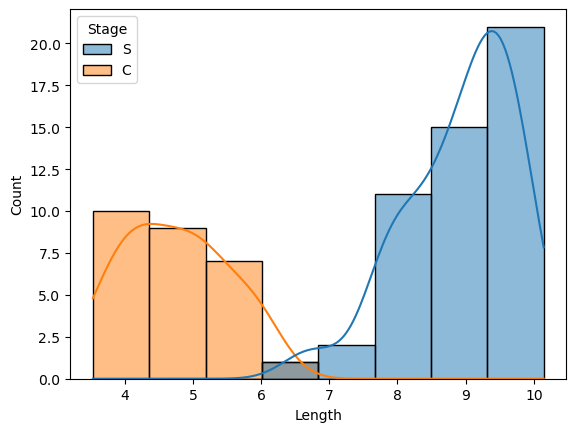

In [43]:
import seaborn as sns
# Seaborn histogram for ovary lengths with hue = Stage
sns.histplot(data=data, x='Length', hue='Stage', kde=True)

#### Interpretataion: 
1. During stage C (corolla development), the ovary length predominantly ranges between 4 and 6. In contrast, during stage S (stigma development), the ovary length primarily falls within the range of 7 to 10. This pattern reflects the sequential nature of development, where corolla development precedes stigma development.
2. The describe function state mean to be around 7 but in reality not many observations fall under the length of 7 exactly.
3. This observation aligns with Figure 1C of the paper.
----------------------

#### Purpose: 
##### The purpose is to generate the bar plot that visullly represent the relationship between the floret position and the overy length of the sunflower florets. By plotting the Floret.Position on the x-axis and the Length on the y-axis, we aims to explore how the length of the ovary varies across different floret positions within the sunlower head.

<Axes: xlabel='Floret.Position', ylabel='Length'>

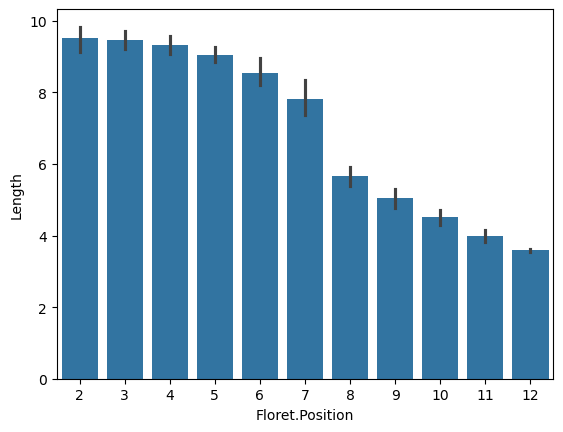

In [44]:
# Seaborn bar plot for Floret Position against the Overy Length of that particular floret
sns.barplot(data = data, x = "Floret.Position", y = "Length")

#### Interpretataion: 
1. The ovary length generally decreases as the floret position increases.  This suggests that florets located towards the center of the sunflower head tend to have longer ovaries compared to those situated further out.
2. The describe function shows floret.posistion have 50% of the observations fall below 6 posistion. The length of florets in these 50% of observations is reletevely high (around 9) compare to the actual mean length of floret at 7.4
3. This data is also consisitant with the figure 6E of the paper.
-------------------